**<center><h1>LIMPIEZA Y TRANSFORMACIÓN DE DATOS</h1><center>**

El proceso de preprocesamiento de datos se lleva a cabo una vez que hemos explorado y limpiado nuestro conjunto de datos, de modo que entendamos su contenido, estructura y calidad. Al explorar nuestros datos, es probable que obtengamos una buena idea de cómo queremos modelarlos, lo cual nos ayudará a decidir la mejor manera de preprocesarlos para que estén listos para el modelado desde el principio.

In [8]:
#Importar la librería Pandas
import pandas as pd

In [58]:
#Cargar el dataset
df = pd.read_csv("clientes.csv", sep=';')

# **0. Entendimeinto de los Datos**

In [49]:
#Obtener información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    157 non-null    int64  
 1   Nombre                            155 non-null    object 
 2   Última fecha de compra            156 non-null    object 
 3   Frecuencia de compra              157 non-null    int64  
 4   Valor promedio de la compra       152 non-null    float64
 5   Categoría de productos comprados  151 non-null    object 
 6   Método de pago                    153 non-null    object 
 7   Edad                              154 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.9+ KB


In [11]:
# df.head()
df

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,1/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0
...,...,...,...,...,...,...,...,...
152,160,Andrea Soto,9/06/2022,2,50.0,Electrónica,Transferencia bancaria,25.0
153,161,Laura Hernandez,6/06/2022,1,120.0,Alimentos,Efectivo,39.0
154,145,Luis Garcia,4/06/2022,4,75.2,Alimentos,Transferencia bancaria,28.0
155,154,Luisa Perez,8/06/2022,2,80.0,Ropa,Transferencia bancaria,33.0


In [12]:
!pip install ydata-profiling

In [13]:
#Crear un reporte HTML del dataset para conocer valores nulos, repetidos, etc.
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report.to_file(output_file='reporte.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7dd9e3f5bb50, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **1. Tratamiento de valores nulos**

Los datos nulos o faltantes pueden ser problemáticos en un conjunto de datos, ya que pueden afectar la precisión de los análisis. Para tratar los datos nulos o faltantes, podemos utilizar varias funciones que veremos a continuación.

In [14]:
#Obtener la cantidad de nulos por columna
df.isnull().sum()

,0
ID del cliente,0
Nombre,2
Última fecha de compra,1
Frecuencia de compra,0
Valor promedio de la compra,5
Categoría de productos comprados,6
Método de pago,4
Edad,3


In [16]:
# Mostrar la informacion de registros especificos
df.loc[[16, 30, 35]]

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
16,18,Jorge Martinez,14/03/2022,4,NaN,NaN,NaN,39.0
30,32,Andrea Torres,NaN,3,120.5,NaN,Tarjeta de crédito,26.0
35,38,Ana Garcia,15/04/2022,2,NaN,Ropa,Transferencia bancaria,27.0


In [17]:
#Eliminar filas específicas donde se encuentran los valores nulos
df.drop([16, 30, 35], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    154 non-null    int64  
 1   Nombre                            152 non-null    object 
 2   Última fecha de compra            154 non-null    object 
 3   Frecuencia de compra              154 non-null    int64  
 4   Valor promedio de la compra       151 non-null    float64
 5   Categoría de productos comprados  150 non-null    object 
 6   Método de pago                    151 non-null    object 
 7   Edad                              151 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.8+ KB


In [19]:
#Eliminar todos los registros que contengan valores nulos
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    142 non-null    int64  
 1   Nombre                            142 non-null    object 
 2   Última fecha de compra            142 non-null    object 
 3   Frecuencia de compra              142 non-null    int64  
 4   Valor promedio de la compra       142 non-null    float64
 5   Categoría de productos comprados  142 non-null    object 
 6   Método de pago                    142 non-null    object 
 7   Edad                              142 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.0+ KB


Otro tratamiento para los datos nulos o faltantes, es utilizar la función fillna() de la librería Pandas en Python. Por ejemplo, podemos llenar los valores nulos con la media de la columna utilizando el siguiente código:

In [24]:
# Tratamiento de valores nulos con fillna.
# No olvide cargar nuevamente el df

# Valores Cuantitativos
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.fillna(df[numeric_cols].mean(axis=0), inplace=True)

In [25]:
# Valores Cualitativos
categorical_cols = df.select_dtypes(include=['object']).columns
df.fillna(df[categorical_cols].mode().iloc[0], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    157 non-null    int64  
 1   Nombre                            157 non-null    object 
 2   Última fecha de compra            157 non-null    object 
 3   Frecuencia de compra              157 non-null    int64  
 4   Valor promedio de la compra       157 non-null    float64
 5   Categoría de productos comprados  157 non-null    object 
 6   Método de pago                    157 non-null    object 
 7   Edad                              157 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.9+ KB


In [27]:
df

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,1/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,Efectivo,22.0
...,...,...,...,...,...,...,...,...
152,160,Andrea Soto,9/06/2022,2,50.0,Electrónica,Transferencia bancaria,25.0
153,161,Laura Hernandez,6/06/2022,1,120.0,Alimentos,Efectivo,39.0
154,145,Luis Garcia,4/06/2022,4,75.2,Alimentos,Transferencia bancaria,28.0
155,154,Luisa Perez,8/06/2022,2,80.0,Ropa,Transferencia bancaria,33.0


# **2. Tratamiento de valores atípicos**

Pandas ofrece varias funciones que se pueden usar para tratar valores atípicos o valores anómalos en un conjunto de datos.

Una opción común es simplemente eliminar los valores atípicos del conjunto de datos. Esto se puede hacer utilizando el método ``` drop() ``` de Pandas.
```
#df = df.drop(df[df['nombre_columna'] > limite_superior].index)
#df = df.drop(df[df['nombre_columna'] < limite_inferior].index)
```







In [31]:
#Podemos conocer valores mínimos y máximos de cada columna con describe()
# df.describe()
df['Edad'].describe()

,Edad
count,157.000000
mean,31.233766
std,9.058069
min,1.000000
25%,26.000000
50%,30.000000
75%,37.000000
max,80.000000


<Axes: >

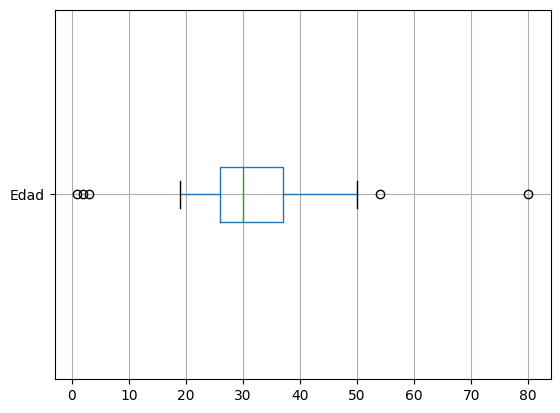

In [33]:
#Visualizar valores atípicos con gráficos
df.boxplot(column='Edad', vert=False)

In [40]:
#Eliminamos valores atípicos de la columna edad
df.drop(df[df['Edad'] < 18].index, inplace=True)
df.drop(df[df['Edad'] > 50].index, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    152 non-null    int64  
 1   Nombre                            150 non-null    object 
 2   Última fecha de compra            151 non-null    object 
 3   Frecuencia de compra              152 non-null    int64  
 4   Valor promedio de la compra       147 non-null    float64
 5   Categoría de productos comprados  146 non-null    object 
 6   Método de pago                    148 non-null    object 
 7   Edad                              149 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.7+ KB


Otra opción es reemplazar los valores atípicos con algún valor más adecuado. Esto se puede hacer utilizando la función replace() de Pandas.
```
df.loc[df['nombre_columna'] > limite_superior, 'nombre_columna'] = limite_superior
```



In [42]:
#Cambiar las edades limite inferior
df.loc[df['Edad'] < 18, 'Edad'] = round(df['Edad'].mean())

#Cambiar las edades limite superior
df.loc[df['Edad'] > 50, 'Edad'] = round(df['Edad'].mean())

<Axes: >

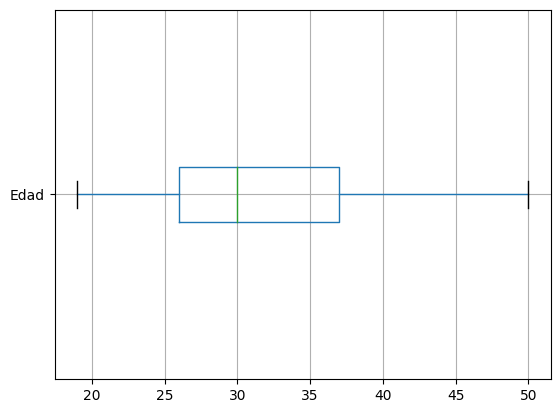

In [43]:
#Visualización del tratamiento final de la edad
df.boxplot(column='Edad', vert=False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID del cliente                    152 non-null    int64  
 1   Nombre                            150 non-null    object 
 2   Última fecha de compra            151 non-null    object 
 3   Frecuencia de compra              152 non-null    int64  
 4   Valor promedio de la compra       147 non-null    float64
 5   Categoría de productos comprados  146 non-null    object 
 6   Método de pago                    148 non-null    object 
 7   Edad                              149 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.7+ KB


# **3. Eliminar variables irrelevantes**


Para eliminar variables irrelevantes (también conocidas como características o atributos) de un DataFrame en Pandas, puedes utilizar la función drop(). Esta función elimina una o varias columnas de un DataFrame. Puedes seleccionar las columnas que deseas eliminar utilizando su nombre o su índice.
```
df = df.drop(['columna1', 'columna2'], axis=1)
```

```
df = df.drop(df.columns[[0, 2]], axis=1)

```





In [50]:
#Elimina la columna "Nombre" por etiqueta o nombre
df.drop(['Nombre'], axis=1)

,ID del cliente,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,1/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,3,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,20/03/2022,4,75.8,Ropa,Efectivo,22.0
...,...,...,...,...,...,...,...
152,160,9/06/2022,2,50.0,Electrónica,Transferencia bancaria,25.0
153,161,6/06/2022,1,120.0,Alimentos,Efectivo,39.0
154,145,4/06/2022,4,75.2,Alimentos,Transferencia bancaria,28.0
155,154,8/06/2022,2,80.0,Ropa,Transferencia bancaria,33.0


In [51]:
#Elimina la columna "ID del cliente y Última fecha de compra" por indice
df.drop(df.columns[[0, 1]], axis=1)

,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,15/03/2022,5,200.5,Ropa,Tarjeta de crédito,32.0
1,1/04/2022,2,80.0,Juguetes,Efectivo,45.0
2,10/12/2021,3,150.2,Electrónica,Transferencia bancaria,28.0
3,28/02/2022,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,20/03/2022,4,75.8,Ropa,Efectivo,22.0
...,...,...,...,...,...,...
152,9/06/2022,2,50.0,Electrónica,Transferencia bancaria,25.0
153,6/06/2022,1,120.0,Alimentos,Efectivo,39.0
154,4/06/2022,4,75.2,Alimentos,Transferencia bancaria,28.0
155,8/06/2022,2,80.0,Ropa,Transferencia bancaria,33.0


# **4. Trasformación de variables**

**Codificación one-hot:** esta técnica implica crear una columna binaria para cada categoría de la variable categórica. La columna tendrá un valor de 1 si la categoría está presente y 0 en caso contrario. Pandas tiene una función get_dummies() que realiza esta codificación automáticamente.

<Axes: ylabel='Método de pago'>

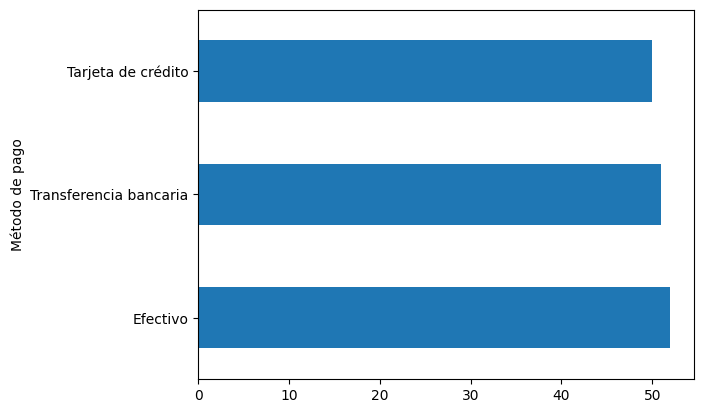

In [62]:
grafica_mp = df['Método de pago'].value_counts()
grafica_mp.plot(kind='barh')

In [55]:
#Transforma la columna 'Método de pago'
pd.get_dummies(df, columns=['Método de pago'])

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Edad,Método de pago_Efectivo,Método de pago_Tarjeta de crédito,Método de pago_Transferencia bancaria
0,1,Juan Perez,15/03/2022,5,200.5,Ropa,32.0,False,True,False
1,2,Ana Rodriguez,1/04/2022,2,80.0,Juguetes,45.0,True,False,False
2,3,Luisa Hernandez,10/12/2021,3,150.2,Electrónica,28.0,False,False,True
3,4,Carlos Garcia,28/02/2022,1,300.0,Alimentos,50.0,False,True,False
4,5,Maria Gomez,20/03/2022,4,75.8,Ropa,22.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
152,160,Andrea Soto,9/06/2022,2,50.0,Electrónica,25.0,False,False,True
153,161,Laura Hernandez,6/06/2022,1,120.0,Alimentos,39.0,True,False,False
154,145,Luis Garcia,4/06/2022,4,75.2,Alimentos,28.0,False,False,True
155,154,Luisa Perez,8/06/2022,2,80.0,Ropa,33.0,False,False,True


**Codificación ordinal:** esta técnica implica asignar un número único a cada categoría de la variable categórica en orden de importancia o frecuencia.

<Axes: ylabel='Categoría de productos comprados'>

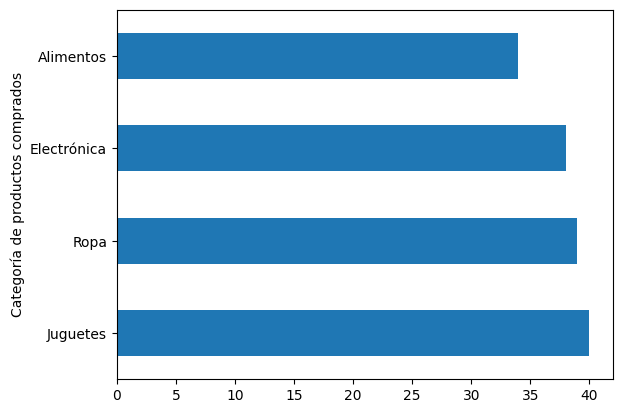

In [64]:
grafica_cpc = df['Categoría de productos comprados'].value_counts()
grafica_cpc.plot(kind='barh')

In [65]:
#Transforma columna 'Categoría de productos comprados'
df['Categoría de productos comprados'] = df['Categoría de productos comprados'].map({'Ropa': 1, 'Juguetes': 2, 'Electrónica': 3, 'Alimentos':4})


In [66]:
df

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,15/03/2022,5,200.5,1.0,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,1/04/2022,2,80.0,2.0,Efectivo,45.0
2,3,Luisa Hernandez,10/12/2021,3,150.2,3.0,Transferencia bancaria,28.0
3,4,Carlos Garcia,28/02/2022,1,300.0,4.0,Tarjeta de crédito,50.0
4,5,Maria Gomez,20/03/2022,4,75.8,1.0,Efectivo,22.0
...,...,...,...,...,...,...,...,...
152,160,Andrea Soto,9/06/2022,2,50.0,3.0,Transferencia bancaria,25.0
153,161,Laura Hernandez,6/06/2022,1,120.0,4.0,Efectivo,39.0
154,145,Luis Garcia,4/06/2022,4,75.2,4.0,Transferencia bancaria,28.0
155,154,Luisa Perez,8/06/2022,2,80.0,1.0,Transferencia bancaria,33.0


# **5. Renombrar columnas**


Renombrar las columnas de un DataFrame de Pandas es una tarea común en el análisis de datos. A menudo, los nombres de las columnas pueden ser poco claros o difíciles de entender, o pueden contener errores.

In [ ]:
#Renombra las columnas del df - Todas
df.columns = ['frecuencia_compra', 'valor_promedio_compra', 'categoria_compra', 'edad', 'pago_efectivo', 'pago_credito', 'pago_transferencia']

In [ ]:
#Renombrar una columna especifica
df.rename(columns={'categoria_compra':'categoria'}, inplace=True)

# **6. Unir Datasets**

In [ ]:
# Cargar los datos del primer dataset
datos = pd.read_excel('Parte01Clientes.xlsx')
datos.head()

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra
0,1,Juan Perez,2022-03-15,5
1,2,Ana Rodriguez,2022-04-01,2
2,3,Luisa Hernandez,2021-12-10,3
3,4,Carlos Garcia,2022-02-28,1
4,5,Maria Gomez,2022-03-20,4


In [ ]:
# Cargar los datos del segundo dataset
datos_pdf = pd.read_excel('Parte02Clientes.xlsx')
datos_pdf.head()

,ID del cliente,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,200.5,Ropa,Tarjeta de crédito,32.0
1,2,80.0,Juguetes,Efectivo,45.0
2,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,75.8,Ropa,Efectivo,22.0


In [ ]:
# Unir los datos basados en la columna "Documento", especificando qué columnas incluir
datos_unidos = pd.merge(datos, datos_pdf[['ID del cliente',	'Valor promedio de la compra',
                                          'Categoría de productos comprados',	'Método de pago',
                                          'Edad']], on='ID del cliente')
datos_unidos.head()

,ID del cliente,Nombre,Última fecha de compra,Frecuencia de compra,Valor promedio de la compra,Categoría de productos comprados,Método de pago,Edad
0,1,Juan Perez,2022-03-15,5,200.5,Ropa,Tarjeta de crédito,32.0
1,2,Ana Rodriguez,2022-04-01,2,80.0,Juguetes,Efectivo,45.0
2,3,Luisa Hernandez,2021-12-10,3,150.2,Electrónica,Transferencia bancaria,28.0
3,4,Carlos Garcia,2022-02-28,1,300.0,Alimentos,Tarjeta de crédito,50.0
4,5,Maria Gomez,2022-03-20,4,75.8,Ropa,Efectivo,22.0


In [ ]:
# Guardar los datos unidos en un nuevo archivo de Excel
datos_unidos.to_excel('Dataset_final.xlsx', index=False)